In [1]:
import ex4, numpy as np, matplotlib.pyplot as plt
from ex4 import rbfprojector, DDPG, Memory, Pendulum
from scipy import stats
import matplotlib.pyplot as plt
from time import time
import statistics

help(ex4)

Help on module ex4:

NAME
    ex4 - ELE2761 Exercise 4: Policy approximation.

DESCRIPTION
    Implements the provided functionality to be used in your solution.
    
    CLASSES
        DDPG         -- Deep Deterministic Policy Gradient network
        Memory       -- Replay Memory
    
    FUNCTIONS
        rbfprojector -- Gaussian RBF projector factory.

CLASSES
    builtins.object
        DDPG
        Environment
            Pendulum
        Memory
    
    class DDPG(builtins.object)
     |  DDPG(states, actions=1, hiddens=[25, 25], tau=0.01)
     |  
     |  Deep Deterministic Policy Gradient
     |  
     |  METHODS
     |      train       -- Train network.
     |      __call__    -- Evaluate network.
     |      __ilshift__ -- Copy network weights.
     |  
     |  Methods defined here:
     |  
     |  __ilshift__(self, other)
     |      Copies network weights.
     |      
     |      dqn2 <<= dqn1 copies the weights from `dqn1` into `dqn2`. The
     |      networks must hav

## Exercise 1

### Exercise 1.1

The return value is the approximation value of the actor's action in a given state 's'.

## Exercise 2

### Exercise 2.1

20


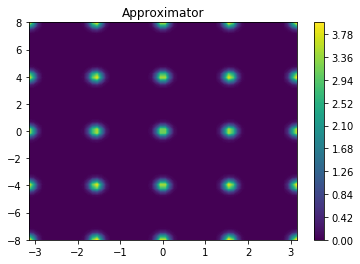

In [11]:
feature = rbfprojector(5, sigma = 0.1)
theta = np.ones(len(feature([0,0,0])))
pendulum = Pendulum()
pendulum.plotlinear(theta,feature)
print(len(theta))

### Exercise 2.2

The number of basis functions defined is 5 per dimension. In a first thought, we guess that there is 25 basis functions. But due to the periodicity of the pendulum in the position dimension (represented by sine and cosine), the vertical ends are "interconected" or may be interpreted as the same one.

Looking at the plot like that, we understand that the feature vector size is the same as the number of basis functions, in this case 20.

The plot show us which of the possibe states have most reward. That's why going for more basis function (nbasis) will increase the "precision" of the state that has the most reward. In the plot above, we would have a poor representation of the state space.

### Exercise 2.3

In [35]:
lista_rewards = np.empty(100)

start_time = time()

# TODO: Create environment
pendulum = Pendulum()

gamma = 0.99
sigma = 2
batch_size = 256

nbasis = 21
width = 0.25
alpha = 0.2
beta = 0.01

phi = rbfprojector(nbasis, width)       #feature
theta = np.ones(len(phi([0,0,0])))*0.01 #actor
w = np.ones(len(phi([0,0,0])))*0.01     #critic

#Episódios
for e in range(100):
    # TODO: Reset environment
    s = pendulum.reset()

    # reset do total reward
    total_reward = 0

    #Trials
    for t in range(1000):
        # TODO: Select action (exercise 2.2)

        a = np.random.normal(np.dot(phi(s), theta), sigma)

        # TODO: Step environment
        s_p, r, done, info = pendulum.step(a)

        #acumulo total reward
        total_reward = total_reward + r


        delta = r + (gamma * np.dot(phi(s_p).T,w) - np.dot(phi(s).T,w))

        w = w + alpha * np.dot(delta, phi(s))

        theta = theta + beta*np.dot((a - np.dot(phi(s).T, theta)), np.dot(phi(s),delta))

        s = np.copy(s_p)


        # TODO: Render current state
#         if t%1 == 0:
#             pendulum.render()

        if done:
            break


    lista_rewards[e] = total_reward
    print(str(e) + 'Episódio  ——>   total reward: ' + str(total_reward))

#     sigma = sigma * 0.99
#     if sigma < 0.05:
#         sigma = 0.05
    
    end_time = time()
    computation_time = end_time - start_time
    
    
    rise_time = 0
    for ep in reversed(range(len(lista_rewards))):
        if lista_rewards[ep] < -500:
            ep = ep+2
            break
    rise_time = ep

# Close environment
pendulum.close()

print('Computation time: ' + str(computation_time))
print('Rise time: ' + str(rise_time) + ' episodes')

0Episódio  ——>   total reward: -1346.6547742771595
1Episódio  ——>   total reward: -1022.7673769585742
2Episódio  ——>   total reward: -965.0913525869989
3Episódio  ——>   total reward: -1288.4424991775306
4Episódio  ——>   total reward: -902.9583616377242
5Episódio  ——>   total reward: -1368.6385341536113
6Episódio  ——>   total reward: -1516.0500230186947
7Episódio  ——>   total reward: -660.2695024556884
8Episódio  ——>   total reward: -1503.8740519658234
9Episódio  ——>   total reward: -1323.040630851099
10Episódio  ——>   total reward: -251.17418537897106
11Episódio  ——>   total reward: -4.039146665110049
12Episódio  ——>   total reward: -253.178684885388
13Episódio  ——>   total reward: -756.0278664982516
14Episódio  ——>   total reward: -377.7913583006813
15Episódio  ——>   total reward: -375.85431276261835
16Episódio  ——>   total reward: -258.42193717439386
17Episódio  ——>   total reward: -391.29400354368227
18Episódio  ——>   total reward: -122.95115254077425
19Episódio  ——>   total reward:

### Exercise 2.3 - Plots:

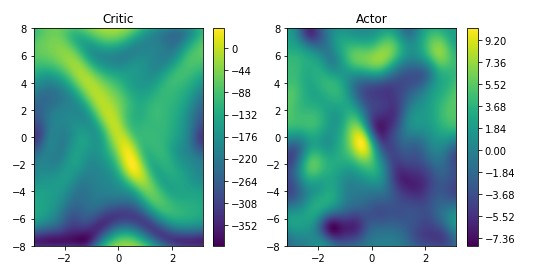

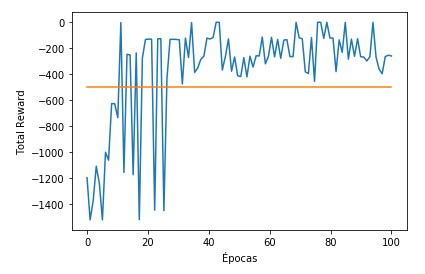

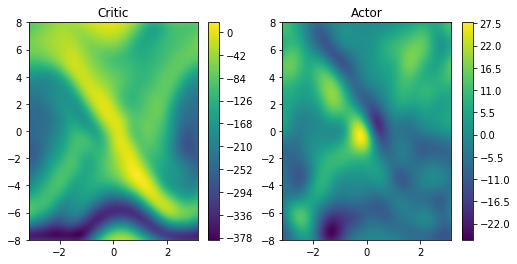

In [36]:
pendulum.plotlinear(w, theta, phi)

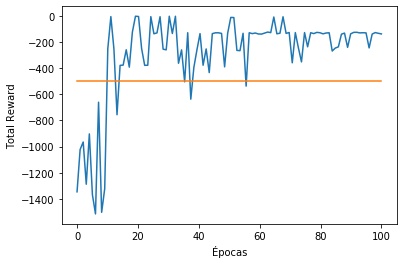

In [37]:
epocas = np.linspace(0,100,100)

plt.xlabel('Épocas')
plt.ylabel('Total Reward')
plt.plot(epocas, lista_rewards)
plt.plot(epocas, np.ones(100)*-500)

In [43]:
# end performance (after training)

lista_rewards = np.empty(100)

start_time = time()

# TODO: Create environment
pendulum = Pendulum()

# gamma = 0.99
sigma = 0
# batch_size = 256

# nbasis = 21
# width = 0.25
alpha = 0
beta = 0

#Episódios
for e in range(100):
    # TODO: Reset environment
    s = pendulum.reset()

    # reset do total reward
    total_reward = 0

    #Trials
    for t in range(1000):
        # TODO: Select action (exercise 2.2)

        a = np.random.normal(np.dot(phi(s), theta), sigma)

        # TODO: Step environment
        s_p, r, done, info = pendulum.step(a)

        #acumulo total reward
        total_reward = total_reward + r


        delta = r + (gamma * np.dot(phi(s_p).T,w) - np.dot(phi(s).T,w))

        w = w + alpha * np.dot(delta, phi(s))

        theta = theta + beta*np.dot((a - np.dot(phi(s).T, theta)), np.dot(phi(s),delta))

        s = np.copy(s_p)


        # TODO: Render current state
#         if t%1 == 0:
#             pendulum.render()

        if done:
            break


    lista_rewards[e] = total_reward
    print(str(e) + 'Episódio  ——>   total reward: ' + str(total_reward))

    
    end_time = time()
    computation_time = end_time - start_time
    
    
    rise_time = 0
    for ep in reversed(range(len(lista_rewards))):
        if lista_rewards[ep] < -500:
            ep = ep+2
            break
    rise_time = ep

# Close environment
pendulum.close()

print('Computation time: ' + str(computation_time))
print('Rise time: ' + str(rise_time) + ' episodes')
print('End performance: ' + str(np.mean(lista_rewards)))
print('Rewards median: ' + str(statistics.median(lista_rewards)))

0Episódio  ——>   total reward: -239.54418645289002
1Episódio  ——>   total reward: -132.26263434602978
2Episódio  ——>   total reward: -132.13441632167778
3Episódio  ——>   total reward: -240.34693068377715
4Episódio  ——>   total reward: -129.98686114379922
5Episódio  ——>   total reward: -6.623841010480238
6Episódio  ——>   total reward: -247.3721779191387
7Episódio  ——>   total reward: -248.88522063001895
8Episódio  ——>   total reward: -237.07403880923476
9Episódio  ——>   total reward: -127.43933436657787
10Episódio  ——>   total reward: -133.580856002794
11Episódio  ——>   total reward: -350.80999375731545
12Episódio  ——>   total reward: -128.29340614559638
13Episódio  ——>   total reward: -129.837416231996
14Episódio  ——>   total reward: -130.09502565769625
15Episódio  ——>   total reward: -138.5786736972905
16Episódio  ——>   total reward: -138.02505433685693
17Episódio  ——>   total reward: -240.97510858214432
18Episódio  ——>   total reward: -133.6851506744864
19Episódio  ——>   total reward

### Exercise 2.4

**Rise Time and computation time (training)**

1st run — Computation time: 37.95911169052124 <br>
                 Rise time: 72 episodes <br>
          
2nd run — Computation time: 36.35531949996948 <br>
                 Rise time: 27 episodes <br>

3rd run — Computation time: 30.90848422050476 <br>
                 Rise time: 39 episodes <br>

4th run — Computation time: 32.745070457458496 <br>
                 Rise time: 26 episodes <br>

5th run — Computation time: 33.825584173202515 <br>
                 Rise time: 24 episodes <br>
                 
Computation time mean: 34.3587140083313 <br>
       Rise time mean: 37.6 <br>
<br><br>

**End performance (training and exploration disabled)**

1st run — End performance: -152.01838054441816 <br>
          
2nd run — End performance: -138.7744743974546 <br>

3rd run — End performance: -142.83076703838583 <br>

4th run — End performance: -157.32854596656307 <br>

5th run — End performance: -158.1111914281721 <br>

End performance mean: -149.81267187499876 
<br><br>


**Rise Time and computational time with sigma = 2 (training)**

1st run — End performance: -144.7428320659922<br>
           Rewards median: -130.56735802229437<br>
           
2nd run — End performance: -171.08541080695306<br>
           Rewards median: -133.15072436543286<br>

3rd run — End performance: -165.2432355204073<br>
           Rewards median: -134.0701293121271<br>

4th run — End performance: -166.24998446448757<br>
           Rewards median: -134.14729050072282<br>

5th run — End performance: -157.00751628323704<br>
           Rewards median: -133.6330033386402<br>
           
           

In [34]:
print(np.mean([37.95911169052124,36.35531949996948,30.90848422050476,32.745070457458496,33.825584173202515]))
print(np.mean([72,27,39,26,24]))
print(np.mean([-152.01838054441816,-138.7744743974546,-142.83076703838583,-157.32854596656307,-158.1111914281721]))

34.3587140083313
37.6
-149.81267187499876


## Exercise 3

In [2]:
lista_rewards = np.empty(100)


start_time = time()

camadas = [25,25]

# DDPG
ddpg = DDPG(3,1,camadas)

# target DDPG
t_ddpg = DDPG(3,1,camadas)

# Create replay memory
memory = Memory(3,1)

# Create environment
env = Pendulum()

# Parameters
gamma = 0.99
sigma = 2
batch_size = 256


for e in range(100):
    # Reset environment

    #states (s <- start)
    s = env.reset()


    # reset total reward
    total_reward = 0


    # time steps
    for t in range(1000):

        # valor do estado dada uma ação (ação padrão é ação do actor)
        Q = ddpg.critic(s)


        # Select action ( sample a from policy(s,theta) + Ni )
        a = np.random.normal(ddpg.actor(s), sigma/2)


        # Step environment
        s_p, r, done, info = env.step(2*a)


        ########## total reward ########
        total_reward = total_reward + r
        ################################


        # Add transition to replay memory
        memory.add(s, a, r, s_p ,done)


        # If at least 1000 transitions in memory, sample minibatch and learn
        if memory.n >= 1000:

            # choose random minibatch
            b_s, b_a, b_r, b_s_p, b_done = memory.sample(batch_size)


            #train minibatch
            Q_sp_ap = t_ddpg.critic(b_s_p)


            targets = np.empty(batch_size)
            for i in range(batch_size):
                if b_done[i]:
                    targets[i] = b_r[i]
                else:
                     targets[i] = b_r[i] + gamma * Q_sp_ap[i]


            ddpg.train(b_s, b_a, targets)

        s = np.copy(s_p)

        # From exercise 2: Render current state
#             if t%1 == 0:
#                 env.render()
        # TODO: Every 50 timesteps, copy weights to target network
        if t%200 == 0:
            t_ddpg <<= ddpg 


        if done:
            break

    lista_rewards[e] = total_reward
    print(str(e) + 'Episódio  ——>   total reward: ' + str(total_reward))

#     sigma = sigma * 0.99
#     if sigma < 0.05:
#         sigma = 0.05
        
        
        
    end_time = time()
    computation_time = end_time - start_time
    
    
    rise_time = 0
    for ep in reversed(range(len(lista_rewards))):
        if lista_rewards[ep] < -500:
            ep = ep+2
            break
    rise_time = ep
# TODO: Close environment
env.close()


print('Computation time: ' + str(computation_time))
print('Rise time: ' + str(rise_time) + ' episodes')

C:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


0Episódio  ——>   total reward: -1364.4336384581468
1Episódio  ——>   total reward: -1565.2428460854373
2Episódio  ——>   total reward: -1361.0717818780633
3Episódio  ——>   total reward: -1475.9042052554626
4Episódio  ——>   total reward: -1361.7863042450422
5Episódio  ——>   total reward: -1748.6017311835346
6Episódio  ——>   total reward: -1525.7449798006396
7Episódio  ——>   total reward: -1621.3919906674637
8Episódio  ——>   total reward: -1619.6099176872497
9Episódio  ——>   total reward: -1622.8593365428726
10Episódio  ——>   total reward: -1475.2544299475041
11Episódio  ——>   total reward: -1457.1098270065283
12Episódio  ——>   total reward: -1017.8264436988866
13Episódio  ——>   total reward: -1572.3695614712362
14Episódio  ——>   total reward: -1266.9103279352676
15Episódio  ——>   total reward: -1147.801724374164
16Episódio  ——>   total reward: -1133.3307979624715
17Episódio  ——>   total reward: -1035.936121955015
18Episódio  ——>   total reward: -1000.7064336711735
19Episódio  ——>   total 

### Exercise 3.1 - training the ddpg and ploting the results:

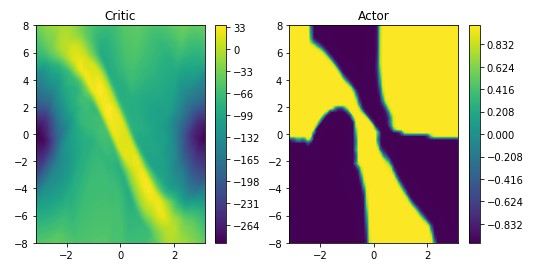

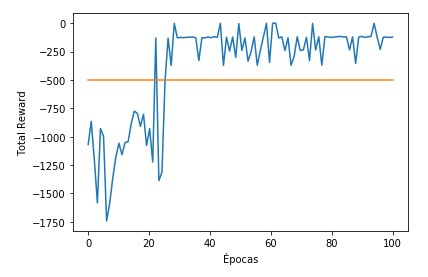


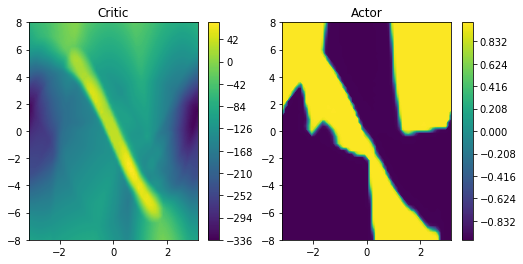

In [3]:
env.plotnetwork(ddpg)

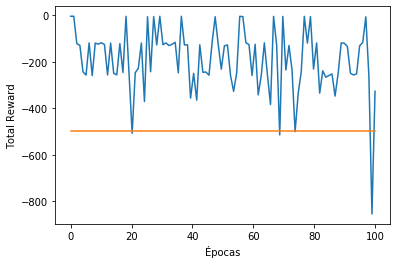

In [11]:
epocas = np.linspace(0,100,100)

plt.xlabel('Épocas')
plt.ylabel('Total Reward')
plt.plot(epocas, lista_rewards)
plt.plot(epocas, np.ones(100)*-500)

In [10]:
# End performance

lista_rewards = np.empty(100)


start_time = time()

camadas = [25,25]

# DDPG
#ddpg = DDPG(3,1,camadas)

# target DDPG
#t_ddpg = DDPG(3,1,camadas)

# Create replay memory
memory = Memory(3,1)

# Create environment
env = Pendulum()

# Parameters
gamma = 0.99
sigma = 0
batch_size = 256


for e in range(100):
    # Reset environment

    #states (s <- start)
    s = env.reset()


    # reset total reward
    total_reward = 0


    # time steps
    for t in range(1000):

        # valor do estado dada uma ação (ação padrão é ação do actor)
        Q = ddpg.critic(s)


        # Select action ( sample a from policy(s,theta) + Ni )
        a = np.random.normal(ddpg.actor(s), sigma/2)


        # Step environment
        s_p, r, done, info = env.step(2*a)


        ########## total reward ########
        total_reward = total_reward + r
        ################################


        # Add transition to replay memory
        memory.add(s, a, r, s_p ,done)


        # If at least 1000 transitions in memory, sample minibatch and learn
        if memory.n >= 1000:

            # choose random minibatch
            b_s, b_a, b_r, b_s_p, b_done = memory.sample(batch_size)


            #train minibatch
            Q_sp_ap = t_ddpg.critic(b_s_p)


            targets = np.empty(batch_size)
            for i in range(batch_size):
                if b_done[i]:
                    targets[i] = b_r[i]
                else:
                     targets[i] = b_r[i] + gamma * Q_sp_ap[i]


            #ddpg.train(b_s, b_a, targets)

        s = np.copy(s_p)

        # From exercise 2: Render current state
#             if t%1 == 0:
#                 env.render()
        # TODO: Every 50 timesteps, copy weights to target network
#         if t%200 == 0:
#             t_ddpg <<= ddpg 


        if done:
            break

    lista_rewards[e] = total_reward
    print(str(e) + 'Episódio  ——>   total reward: ' + str(total_reward))
        
        
        
    end_time = time()
    computation_time = end_time - start_time
    
    
    rise_time = 0
    for ep in reversed(range(len(lista_rewards))):
        if lista_rewards[ep] < -500:
            ep = ep+2
            break
    rise_time = ep
# TODO: Close environment
env.close()


print('Computation time: ' + str(computation_time))
print('Rise time: ' + str(rise_time) + ' episodes')
print('End performance: ' + str(np.mean(lista_rewards)))
print('Rewards median: ' + str(statistics.median(lista_rewards)))

0Episódio  ——>   total reward: -4.508820394896563
1Episódio  ——>   total reward: -4.3488888562820875
2Episódio  ——>   total reward: -122.39257791418294
3Episódio  ——>   total reward: -129.58277127036547
4Episódio  ——>   total reward: -243.4225449983718
5Episódio  ——>   total reward: -257.26328268749864
6Episódio  ——>   total reward: -119.14617249350498
7Episódio  ——>   total reward: -259.53677194274184
8Episódio  ——>   total reward: -119.71699781427652
9Episódio  ——>   total reward: -124.30689927628967
10Episódio  ——>   total reward: -118.31148767597982
11Episódio  ——>   total reward: -126.2733217682833
12Episódio  ——>   total reward: -257.00380300786895
13Episódio  ——>   total reward: -119.7403450095442
14Episódio  ——>   total reward: -249.98618540577488
15Episódio  ——>   total reward: -256.3919566147935
16Episódio  ——>   total reward: -122.03627177697288
17Episódio  ——>   total reward: -246.18975438460322
18Episódio  ——>   total reward: -4.646520645828534
19Episódio  ——>   total rewa

### Exercise 3.2

**Rise Time and computation time (training)**

1st run — Computation time: 456.61933064460754 <br>
                 Rise time: 50 episodes <br>
          
2nd run — Computation time: 418.0909433364868 <br>
                 Rise time: 42 episodes <br>

3rd run — Computation time: 334.22191047668457 <br>
                 Rise time: 98 episodes <br>

4th run — Computation time: 334.6032016277313 <br>
                 Rise time: 29 episodes <br>

5th run — Computation time: 321.1880533695221 <br>
Rise time: 28 episodes <br>
                 
Computation time mean: 372.9446878910065 <br>
       Rise time mean: 49.4 <br>
<br><br>

**End performance (training and exploration disabled)**

1st run — End performance: -161.92278507631167 <br>
          
2nd run — End performance: -135.2937013744592 <br>

3rd run — End performance: -159.43718754942518 <br>

4th run — End performance: -146.03589784583662 <br>

5th run — End performance: -157.16316857124377 <br>

End performance mean: -151.9705480834553
<br><br>


**Rise Time and computational time with sigma = 2 (training)**

1st run — End performance: -184.4623774161304<br>
           Rewards median: -126.52704302285964<br>
           
2nd run — End performance: -173.47491721459323
           Rewards median: -127.69502403291803

3rd run — End performance: -180.289200849209
           Rewards median: -127.74595823114288

4th run — End performance: -177.1196253271473
           Rewards median: -126.86759070223192

5th run — End performance: -191.4496613087964
           Rewards median: -132.9165049951162


In [5]:
print(np.mean([456.61933064460754,418.0909433364868,334.22191047668457,334.6032016277313,321.1880533695221]))
print(np.mean([50,42,98,29,28]))
print(np.mean([-161.92278507631167,-135.2937013744592,-159.43718754942518,-146.03589784583662,-157.16316857124377]))

372.9446878910065
49.4
-151.9705480834553


### Exercise 3.2:

First, talking about computational time, DDPG took a lot more to finish the training. This happens because DDPG trains two networks in each time step, which turns out to be an expensive processing task. On the other hand, linear state-value actor-critic uses a few matrix operations in each time step, which is less costly.

For rise time, we can see that linear state-value actor-critic has less convergence time. It took more episodes for DDPG to converge for values only above -500.

End performance of both methods was very close. DDPG had on average -151.9 in five runs, while linear state-value actor-critic had -149.8, also in five runs. The comparison was a bit surprising, since DDPG is expected to have a more stable result, even if it need more eipisodes to converge.



### Exercise 3.3

Taking a look in the end performances of linear state-value actor-critic and DDPG both with sigma = 2 in training, we see that the first one have, in general, end perfomances with higher values than DDPG.
But if we focus on the median of the rewards, we observe that DDPG had higher values. This behavior is a bit odd, probably meaning that in general, DDPG had better values with some "outliers" pushing the mean downwards. Linear state-value actor-critic in general, probably have a bit worse convergence, or has more jittering in end performance, meaning that DDPG is more stable, as expected.